In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib as mpl

In [227]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [228]:
itraq=pd.read_csv(r"C:\Users\sujal\PycharmProjects\KMeanNeighbourBreastCancer\dataset\77_cancer_proteomes_CPTAC_itraq.csv")

In [229]:
itraq.head(10)

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.106680,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.106680,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.106680,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.106680,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747
5,NP_958780,PLEC,plectin isoform 1f,1.107561,2.646374,-0.654285,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.106680,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
6,NP_958783,PLEC,plectin isoform 1d,1.111370,2.650422,-0.648742,0.215413,-0.500619,2.783366,0.870186,...,-0.943919,-0.487772,-0.106680,-0.062523,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
7,NP_958784,NaN,plectin isoform 1b,1.111370,2.650422,-0.648742,0.215413,-0.500619,2.783366,0.870186,...,-0.943919,-0.487772,-0.106680,-0.062523,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
8,NP_112598,NaN,epiplakin,-1.517390,3.909313,-0.618256,-1.035760,-1.845366,2.205538,1.920171,...,-1.252252,-1.626289,0.025189,-2.187600,-1.969534,0.679466,-2.504862,-0.602132,-0.340726,-0.205013
9,NP_001611,AHNAK,neuroblast differentiation-associated protein ...,0.482754,-1.045294,1.222003,-0.517226,-0.405503,0.749997,2.349197,...,1.325752,0.731148,-1.177327,0.709931,1.307036,0.487574,0.694810,2.778263,1.367330,3.215190


In [230]:
itraq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 86 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   gene_name                12553 non-null  object 
 3   AO-A12D.01TCGA           11334 non-null  float64
 4   C8-A131.01TCGA           11335 non-null  float64
 5   AO-A12B.01TCGA           11334 non-null  float64
 6   BH-A18Q.02TCGA           12024 non-null  float64
 7   C8-A130.02TCGA           12025 non-null  float64
 8   C8-A138.03TCGA           11833 non-null  float64
 9   E2-A154.03TCGA           11833 non-null  float64
 10  C8-A12L.04TCGA           11732 non-null  float64
 11  A2-A0EX.04TCGA           11732 non-null  float64
 12  AO-A12D.05TCGA           11276 non-null  float64
 13  AN-A04A.05TCGA           11276 non-null  float64
 14  BH-A0AV.05TCGA        

In [231]:
itraq.isnull().sum()

RefSeq_accession_number       0
gene_symbol                1780
gene_name                     0
AO-A12D.01TCGA             1219
C8-A131.01TCGA             1218
                           ... 
BH-A0C7.36TCGA             2860
A2-A0SX.36TCGA             2856
263d3f-I.CPTAC             1641
blcdb9-I.CPTAC             1668
c4155b-C.CPTAC             1640
Length: 86, dtype: int64

In [232]:
itraq.describe()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
count,11334.000000,11335.000000,11334.000000,12024.000000,12025.000000,11833.000000,11833.000000,11732.000000,11732.000000,11276.000000,...,11477.000000,10324.000000,10324.000000,10324.000000,9694.000000,9693.000000,9697.000000,10912.000000,10885.000000,10913.000000
mean,0.133079,0.128822,-0.440764,-0.729233,-0.039436,0.115353,-0.618354,-0.305320,-0.021228,0.077247,...,-0.677085,-0.103215,-0.021222,-0.100912,0.488502,-0.368762,-0.050669,0.069555,-0.298170,0.310974
std,1.734231,1.579845,1.634930,2.422452,1.353505,1.652918,2.281818,1.567687,1.651917,1.749695,...,2.018394,1.570606,1.656519,1.628017,1.658080,1.453737,1.716237,1.950822,1.307027,1.706759
min,-12.466750,-13.156553,-9.911008,-24.553794,-15.004199,-12.956961,-16.640848,-18.710032,-14.711526,-13.441463,...,-12.497832,-12.152747,-11.874381,-11.128835,-8.772601,-10.427946,-12.967849,-12.609296,-9.058864,-6.328154
25%,-0.656376,-0.583835,-1.330525,-1.266591,-0.671172,-0.679944,-1.278707,-0.991299,-0.718023,-0.728075,...,-1.731881,-0.815820,-0.740905,-0.805968,-0.497485,-1.063180,-0.934818,-0.867155,-1.056363,-0.652571
50%,0.078915,0.116448,-0.318937,-0.296430,0.024160,0.088055,-0.157218,-0.231885,0.037039,0.045209,...,-0.444306,-0.056808,0.023619,-0.037659,0.314206,-0.204129,-0.079784,0.052313,-0.191285,0.137007
75%,0.905641,0.853163,0.489641,0.449590,0.719492,0.929197,0.670727,0.483663,0.750830,0.862472,...,0.500677,0.657177,0.800701,0.714075,1.276655,0.521043,0.757374,1.009641,0.574868,1.059485
max,17.623036,12.677023,8.289261,11.790434,6.925004,10.602330,10.079191,8.804312,9.548006,13.066445,...,8.839935,10.694780,11.309371,12.638208,11.164262,7.886564,11.521261,16.183559,6.435721,10.497291


In [322]:
patient=pd.read_csv(r"C:\Users\sujal\PycharmProjects\KMeanNeighbourBreastCancer\dataset\clinical_data_breast_cancer.csv")

In [323]:
patient.head(10)

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
5,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
6,TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,T_Other,N0,Negative,...,Basal-like,0,-13,3,5,X,1,2,2,2
7,TCGA-A2-A0D0,FEMALE,60,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
8,TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,2,5,Basal,1,2,2,2
9,TCGA-A2-A0YM,FEMALE,67,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,5,5,Basal,3,2,2,2


In [324]:
patient.isnull().sum()
patient['Gender'].value_counts()

Gender
FEMALE    103
MALE        2
Name: count, dtype: int64

In [325]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Complete TCGA ID                     105 non-null    object 
 1   Gender                               105 non-null    object 
 2   Age at Initial Pathologic Diagnosis  105 non-null    int64  
 3   ER Status                            105 non-null    object 
 4   PR Status                            105 non-null    object 
 5   HER2 Final Status                    105 non-null    object 
 6   Tumor                                105 non-null    object 
 7   Tumor--T1 Coded                      105 non-null    object 
 8   Node                                 105 non-null    object 
 9   Node-Coded                           105 non-null    object 
 10  Metastasis                           105 non-null    object 
 11  Metastasis-Coded                

In [326]:
patient.describe()

,Age at Initial Pathologic Diagnosis,Days to Date of Last Contact,Days to date of Death,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
count,105.000000,105.000000,11.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,58.685714,788.390476,1254.454545,0.104762,817.647619,-4.885714,-7.180952,4.000000,3.342857,2.590476,2.742857,1.980952,2.352381
std,13.066630,645.283040,678.050642,0.307715,672.026613,3.558074,5.022605,1.593255,1.406226,1.342323,1.074428,0.970537,1.091761
min,30.000000,0.000000,160.000000,0.000000,0.000000,-12.000000,-13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,49.000000,240.000000,947.500000,0.000000,240.000000,-6.000000,-12.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,58.000000,643.000000,1364.000000,0.000000,665.000000,-5.000000,-6.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000
75%,67.000000,1288.000000,1627.500000,0.000000,1305.000000,-3.000000,-2.000000,5.000000,4.000000,3.000000,4.000000,3.000000,3.000000
max,88.000000,2850.000000,2483.000000,1.000000,2850.000000,0.000000,0.000000,7.000000,5.000000,5.000000,4.000000,4.000000,5.000000


In [238]:
pam50_protein=pd.read_csv(r"C:\Users\sujal\PycharmProjects\KMeanNeighbourBreastCancer\dataset\PAM50_proteins.csv")

In [239]:
pam50_protein.head(10)

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160
5,ACTR3B,NP_065178,Homo sapiens,ARP3 actin-related protein 3 homolog B (yeast)
6,ACTR3B,NP_001035225,Homo sapiens,ARP3 actin-related protein 3 homolog B (yeast)
7,MLPH,NP_001035932,Homo sapiens,melanophilin
8,MLPH,NP_077006,Homo sapiens,melanophilin
9,ERBB2,NP_001005862,Homo sapiens,v-erb-b2 erythroblastic leukemia viral oncogen...


In [240]:
pam50_protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   GeneSymbol       100 non-null    object
 1   RefSeqProteinID  100 non-null    object
 2   Species          100 non-null    object
 3   Gene Name        100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [241]:
pam50_protein.isnull().sum()

GeneSymbol         0
RefSeqProteinID    0
Species            0
Gene Name          0
dtype: int64

In [327]:
patient.drop(['Gender'],axis=1,inplace=True)

In [328]:
itraq.drop(['gene_name'],axis=1,inplace=True)

KeyError: "['gene_name'] not found in axis"

In [244]:
itraq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Data columns (total 85 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefSeq_accession_number  12553 non-null  object 
 1   gene_symbol              10773 non-null  object 
 2   AO-A12D.01TCGA           11334 non-null  float64
 3   C8-A131.01TCGA           11335 non-null  float64
 4   AO-A12B.01TCGA           11334 non-null  float64
 5   BH-A18Q.02TCGA           12024 non-null  float64
 6   C8-A130.02TCGA           12025 non-null  float64
 7   C8-A138.03TCGA           11833 non-null  float64
 8   E2-A154.03TCGA           11833 non-null  float64
 9   C8-A12L.04TCGA           11732 non-null  float64
 10  A2-A0EX.04TCGA           11732 non-null  float64
 11  AO-A12D.05TCGA           11276 non-null  float64
 12  AN-A04A.05TCGA           11276 non-null  float64
 13  BH-A0AV.05TCGA           11274 non-null  float64
 14  C8-A12T.06TCGA        

In [245]:
itraq['RefSeq_accession_number'].value_counts()

RefSeq_accession_number
NP_219494       1
NP_958782       1
NP_958785       1
NP_958786       1
NP_000436       1
               ..
NP_001138241    1
NP_036222       1
NP_001367       1
NP_076965       1
NP_001611       1
Name: count, Length: 12553, dtype: int64

In [246]:
reference_list=list(itraq.RefSeq_accession_number)

In [247]:
reference_list


['NP_958782',
 'NP_958785',
 'NP_958786',
 'NP_000436',
 'NP_958781',
 'NP_958780',
 'NP_958783',
 'NP_958784',
 'NP_112598',
 'NP_001611',
 'NP_076965',
 'NP_001367',
 'NP_036222',
 'NP_001138241',
 'NP_001714',
 'NP_002464',
 'NP_001073936',
 'NP_061198',
 'NP_001074248',
 'NP_001074419',
 'NP_056009',
 'NP_036355',
 'NP_001155291',
 'NP_002462',
 'NP_000248',
 'NP_036467',
 'NP_004989',
 'NP_001243024',
 'NP_149043',
 'NP_067047',
 'NP_002461',
 'NP_060003',
 'NP_003793',
 'NP_060004',
 'NP_005954',
 'NP_002463',
 'NP_689914',
 'NP_001242941',
 'NP_060227',
 'NP_055796',
 'NP_065935',
 'NP_008974',
 'NP_001156806',
 'NP_000251',
 'NP_001242970',
 'NP_001094891',
 'NP_057323',
 'NP_002465',
 'NP_005955',
 'NP_001035202',
 'NP_001070654',
 'NP_079005',
 'NP_000250',
 'NP_878918',
 'NP_892006',
 'NP_149062',
 'NP_001138722',
 'NP_003118',
 'NP_001123910',
 'NP_001182461',
 'NP_001243000',
 'NP_004406',
 'NP_689916',
 'NP_060124',
 'NP_443141',
 'NP_008835',
 'NP_000375',
 'NP_001447',


In [248]:
import numpy as np

def load_glove_vectors(file_path, encoding='utf-8'):
    embeddings = {}
    with open(file_path, 'r', encoding=encoding) as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

# Load GloVe vectors with specified encoding
glove_vectors = load_glove_vectors(r'C:\Users\sujal\PycharmProjects\KMeanNeighbourBreastCancer\glove embeddings\glove.6B.50d.txt', encoding='utf-8')


In [249]:

def preprocess_refseq(refseq):
    # Convert RefSeq accession numbers to lowercase or other preprocessing steps
    return refseq.lower()

In [250]:
def get_glove_vector(word, glove_vectors, vector_size):
    return glove_vectors.get(word, np.zeros(vector_size))

In [251]:
preprocessed_accessions = [preprocess_refseq(accession) for accession in reference_list]

In [252]:
#defining the vector size (50 for GloVe 50D vectors
vector_size=50
# Map preprocessed RefSeq accession numbers to GloVe vectors
embeddings = np.array([get_glove_vector(accession, glove_vectors, vector_size) for accession in preprocessed_accessions])

In [253]:
print(embeddings)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [254]:
#not working normal glove unable embed the text data
import string
# Create a character set and a mapping
charset = string.ascii_lowercase + string.digits + '_.'  # Add more characters if needed
char_to_index = {char: idx for idx, char in enumerate(charset)}

# Define vector size for character embeddings
char_vector_size = 50

# Initialize random character embeddings (use pre-trained vectors if available)
char_embeddings = np.random.rand(len(charset), char_vector_size)

def preprocess_refseq(refseq):
    return refseq.lower()

def get_character_embedding(refseq, char_to_index, char_embeddings, vector_size):
    embedding = np.zeros(vector_size)
    for char in refseq:
        if char in char_to_index:
            embedding += char_embeddings[char_to_index[char]]
    return embedding

# Example RefSeq accession numbers

preprocessed_accessions = [preprocess_refseq(accession) for accession in reference_list]

# Map preprocessed RefSeq accession numbers to character embeddings
embeddings = np.array([get_character_embedding(accession, char_to_index, char_embeddings, char_vector_size) for accession in preprocessed_accessions])

print(embeddings)

[[4.05589456 4.79492312 5.22107595 ... 4.65939919 4.93146577 6.05702515]
 [3.35216376 4.88515548 4.40932274 ... 4.37806844 4.66989013 5.99788752]
 [3.76679746 4.19943505 4.38108326 ... 4.14907519 4.49148159 5.89975127]
 ...
 [3.88196579 5.29932127 4.06943373 ... 3.33825625 3.37369855 4.52729869]
 [3.66066655 4.90551496 4.69576091 ... 4.41291078 4.0917956  5.48454918]
 [5.01204695 5.15026797 6.62363179 ... 3.9300808  4.92498085 4.9593962 ]]


In [255]:
for i in range(char_vector_size):
    itraq[f'ref_seq_embedding_{i}'] = embeddings[:, i]

In [256]:
itraq.drop(columns=['RefSeq_accession_number'], inplace=True)

In [257]:
itraq.head()

,gene_symbol,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,ref_seq_embedding_40,ref_seq_embedding_41,ref_seq_embedding_42,ref_seq_embedding_43,ref_seq_embedding_44,ref_seq_embedding_45,ref_seq_embedding_46,ref_seq_embedding_47,ref_seq_embedding_48,ref_seq_embedding_49
0,PLEC,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,...,5.320253,4.629479,4.168436,4.254725,4.601492,5.189199,4.040429,4.659399,4.931466,6.057025
1,NaN,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,...,5.097194,4.966734,3.941608,3.555728,5.033548,5.430007,3.886424,4.378068,4.669890,5.997888
2,PLEC,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,...,4.895635,4.482819,3.604672,4.093630,4.295572,5.353730,4.288578,4.149075,4.491482,5.899751
3,NaN,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,...,3.983480,3.679068,5.497591,3.722800,2.140177,4.349842,3.785860,2.963171,3.135409,4.032063
4,NaN,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,...,5.371541,4.070302,3.463414,4.153386,4.383065,5.651814,4.397271,3.947641,4.708786,5.630138


In [258]:
itraq['gene_symbol'].value_counts()

gene_symbol
PLEC        4
SORBS2      4
ZC3H14      4
RAP1GDS1    4
MTUS1       4
           ..
MYO5B       1
MYH9        1
DST         1
MACF1       1
DYNC1H1     1
Name: count, Length: 10062, dtype: int64

In [259]:
itraq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Columns: 134 entries, gene_symbol to ref_seq_embedding_49
dtypes: float64(133), object(1)
memory usage: 12.8+ MB


In [260]:
itraq.describe()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,ref_seq_embedding_40,ref_seq_embedding_41,ref_seq_embedding_42,ref_seq_embedding_43,ref_seq_embedding_44,ref_seq_embedding_45,ref_seq_embedding_46,ref_seq_embedding_47,ref_seq_embedding_48,ref_seq_embedding_49
count,11334.000000,11335.000000,11334.000000,12024.000000,12025.000000,11833.000000,11833.000000,11732.000000,11732.000000,11276.000000,...,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000
mean,0.133079,0.128822,-0.440764,-0.729233,-0.039436,0.115353,-0.618354,-0.305320,-0.021228,0.077247,...,5.082186,4.037290,5.186228,4.686814,3.258606,5.390093,4.641726,3.817555,4.071343,5.226125
std,1.734231,1.579845,1.634930,2.422452,1.353505,1.652918,2.281818,1.567687,1.651917,1.749695,...,0.918729,0.850480,0.866602,1.106952,0.670582,1.050320,1.000434,0.592103,0.668017,0.931289
min,-12.466750,-13.156553,-9.911008,-24.553794,-15.004199,-12.956961,-16.640848,-18.710032,-14.711526,-13.441463,...,3.118312,1.387756,2.562983,1.782455,1.507578,2.781007,2.127140,2.494650,2.689048,2.992831
25%,-0.656376,-0.583835,-1.330525,-1.266591,-0.671172,-0.679944,-1.278707,-0.991299,-0.718023,-0.728075,...,4.408098,3.442887,4.591469,3.901699,2.769549,4.701296,3.931050,3.392484,3.582943,4.563296
50%,0.078915,0.116448,-0.318937,-0.296430,0.024160,0.088055,-0.157218,-0.231885,0.037039,0.045209,...,4.995167,3.990816,5.120648,4.621737,3.240506,5.109511,4.466880,3.757472,3.953419,5.089989
75%,0.905641,0.853163,0.489641,0.449590,0.719492,0.929197,0.670727,0.483663,0.750830,0.862472,...,5.696180,4.569430,5.691628,5.416229,3.729252,5.729470,5.220096,4.167400,4.474944,5.770850
max,17.623036,12.677023,8.289261,11.790434,6.925004,10.602330,10.079191,8.804312,9.548006,13.066445,...,8.317578,7.309222,8.149788,8.204120,6.188452,9.224635,8.336789,6.223785,6.434050,8.354741


In [261]:
itraq.head()

,gene_symbol,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,ref_seq_embedding_40,ref_seq_embedding_41,ref_seq_embedding_42,ref_seq_embedding_43,ref_seq_embedding_44,ref_seq_embedding_45,ref_seq_embedding_46,ref_seq_embedding_47,ref_seq_embedding_48,ref_seq_embedding_49
0,PLEC,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,...,5.320253,4.629479,4.168436,4.254725,4.601492,5.189199,4.040429,4.659399,4.931466,6.057025
1,NaN,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,...,5.097194,4.966734,3.941608,3.555728,5.033548,5.430007,3.886424,4.378068,4.669890,5.997888
2,PLEC,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,...,4.895635,4.482819,3.604672,4.093630,4.295572,5.353730,4.288578,4.149075,4.491482,5.899751
3,NaN,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,...,3.983480,3.679068,5.497591,3.722800,2.140177,4.349842,3.785860,2.963171,3.135409,4.032063
4,NaN,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,...,5.371541,4.070302,3.463414,4.153386,4.383065,5.651814,4.397271,3.947641,4.708786,5.630138


In [262]:
from sklearn.impute import KNNImputer

from sklearn.metrics import nan_euclidean_distances

In [263]:
knnimputer=KNNImputer()

In [264]:
numerical_columns = itraq.select_dtypes(include=[np.number]).columns
categorical_columns = itraq.select_dtypes(exclude=[np.number]).columns
categorical_data = itraq[categorical_columns]
numerical_data = itraq[numerical_columns]
numerical_data_imputed = pd.DataFrame(knnimputer.fit_transform(numerical_data), columns=numerical_data.columns, index=numerical_data.index)

In [265]:
print(categorical_data)
itraq=numerical_data_imputed
itraq['gene_symbol']=categorical_data

      gene_symbol
0            PLEC
1             NaN
2            PLEC
3             NaN
4             NaN
...           ...
12548         NaN
12549         NaN
12550       COX8A
12551        MIIP
12552    KIAA1737

[12553 rows x 1 columns]


In [266]:
itraq.isnull().sum()

# Fit and transform the gene_symbol column
gene_symbols = itraq[['gene_symbol']]



In [267]:
itraq.describe()


,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,ref_seq_embedding_40,ref_seq_embedding_41,ref_seq_embedding_42,ref_seq_embedding_43,ref_seq_embedding_44,ref_seq_embedding_45,ref_seq_embedding_46,ref_seq_embedding_47,ref_seq_embedding_48,ref_seq_embedding_49
count,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,...,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000,12553.000000
mean,0.199163,0.184369,-0.458120,-0.774809,-0.037451,0.150692,-0.697842,-0.308609,-0.035199,0.118856,...,5.082186,4.037290,5.186228,4.686814,3.258606,5.390093,4.641726,3.817555,4.071343,5.226125
std,1.701257,1.541094,1.578630,2.408393,1.331631,1.631209,2.274450,1.531735,1.614754,1.692786,...,0.918729,0.850480,0.866602,1.106952,0.670582,1.050320,1.000434,0.592103,0.668017,0.931289
min,-12.466750,-13.156553,-9.911008,-24.553794,-15.004199,-12.956961,-16.640848,-18.710032,-14.711526,-13.441463,...,3.118312,1.387756,2.562983,1.782455,1.507578,2.781007,2.127140,2.494650,2.689048,2.992831
25%,-0.583990,-0.519069,-1.291724,-1.353571,-0.654773,-0.639716,-1.451823,-0.972108,-0.720837,-0.662108,...,4.408098,3.442887,4.591469,3.901699,2.769549,4.701296,3.931050,3.392484,3.582943,4.563296
50%,0.136062,0.177167,-0.352194,-0.336575,0.017600,0.124626,-0.228723,-0.245593,0.025783,0.092853,...,4.995167,3.990816,5.120648,4.621737,3.240506,5.109511,4.466880,3.757472,3.953419,5.089989
75%,0.947549,0.901737,0.431578,0.422827,0.699813,0.965768,0.621803,0.461730,0.716126,0.895456,...,5.696180,4.569430,5.691628,5.416229,3.729252,5.729470,5.220096,4.167400,4.474944,5.770850
max,17.623036,12.677023,8.289261,11.790434,6.925004,10.602330,10.079191,8.804312,9.548006,13.066445,...,8.317578,7.309222,8.149788,8.204120,6.188452,9.224635,8.336789,6.223785,6.434050,8.354741


In [268]:
itraq.head()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,ref_seq_embedding_41,ref_seq_embedding_42,ref_seq_embedding_43,ref_seq_embedding_44,ref_seq_embedding_45,ref_seq_embedding_46,ref_seq_embedding_47,ref_seq_embedding_48,ref_seq_embedding_49,gene_symbol
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,4.629479,4.168436,4.254725,4.601492,5.189199,4.040429,4.659399,4.931466,6.057025,PLEC
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,4.966734,3.941608,3.555728,5.033548,5.430007,3.886424,4.378068,4.669890,5.997888,NaN
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,4.482819,3.604672,4.093630,4.295572,5.353730,4.288578,4.149075,4.491482,5.899751,PLEC
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,3.679068,5.497591,3.722800,2.140177,4.349842,3.785860,2.963171,3.135409,4.032063,NaN
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,4.070302,3.463414,4.153386,4.383065,5.651814,4.397271,3.947641,4.708786,5.630138,NaN


In [269]:
itraq.head(10)

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,ref_seq_embedding_41,ref_seq_embedding_42,ref_seq_embedding_43,ref_seq_embedding_44,ref_seq_embedding_45,ref_seq_embedding_46,ref_seq_embedding_47,ref_seq_embedding_48,ref_seq_embedding_49,gene_symbol
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,4.629479,4.168436,4.254725,4.601492,5.189199,4.040429,4.659399,4.931466,6.057025,PLEC
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,4.966734,3.941608,3.555728,5.033548,5.430007,3.886424,4.378068,4.669890,5.997888,NaN
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,4.482819,3.604672,4.093630,4.295572,5.353730,4.288578,4.149075,4.491482,5.899751,PLEC
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,3.679068,5.497591,3.722800,2.140177,4.349842,3.785860,2.963171,3.135409,4.032063,NaN
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,4.070302,3.463414,4.153386,4.383065,5.651814,4.397271,3.947641,4.708786,5.630138,NaN
5,1.107561,2.646374,-0.654285,0.215413,-0.503899,2.779709,0.870186,1.407570,1.188860,1.097023,...,4.639178,4.011642,3.277109,4.513632,5.367354,3.771283,3.982521,4.450128,5.575751,PLEC
6,1.111370,2.650422,-0.648742,0.215413,-0.500619,2.783366,0.870186,1.410312,1.188860,1.097023,...,4.242468,3.726505,3.604298,4.333217,4.780826,4.403337,4.002983,4.431600,5.502651,PLEC
7,1.111370,2.650422,-0.648742,0.215413,-0.500619,2.783366,0.870186,1.413053,1.192612,1.097023,...,4.467157,3.905005,4.138397,4.448975,5.156677,3.601493,4.159385,4.799553,5.317349,NaN
8,-1.517390,3.909313,-0.618256,-1.035760,-1.845366,2.205538,1.920171,3.195070,1.046289,-2.413909,...,3.811193,4.380177,4.962195,3.755374,5.555498,4.739041,4.014998,4.862597,5.948226,NaN
9,0.482754,-1.045294,1.222003,-0.517226,-0.405503,0.749997,2.349197,-0.007077,2.138081,0.543630,...,2.541170,4.244682,5.163155,1.993546,6.000427,5.201562,2.661204,3.580485,4.526727,AHNAK


In [270]:
itraq.isnull().sum()

AO-A12D.01TCGA             0
C8-A131.01TCGA             0
AO-A12B.01TCGA             0
BH-A18Q.02TCGA             0
C8-A130.02TCGA             0
                        ... 
ref_seq_embedding_46       0
ref_seq_embedding_47       0
ref_seq_embedding_48       0
ref_seq_embedding_49       0
gene_symbol             1780
Length: 134, dtype: int64

In [271]:
itraq.count()

AO-A12D.01TCGA          12553
C8-A131.01TCGA          12553
AO-A12B.01TCGA          12553
BH-A18Q.02TCGA          12553
C8-A130.02TCGA          12553
                        ...  
ref_seq_embedding_46    12553
ref_seq_embedding_47    12553
ref_seq_embedding_48    12553
ref_seq_embedding_49    12553
gene_symbol             10773
Length: 134, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
itraq['gene_symbol'].fillna('Unknown', inplace=True)



In [273]:

gene_symbols_encoded = encoder.fit_transform(itraq[['gene_symbol']])
encoded_columns = encoder.get_feature_names_out(['gene_symbol'])


In [274]:
itraq['gene_symbol'] 

0            PLEC
1         Unknown
2            PLEC
3         Unknown
4         Unknown
           ...   
12548     Unknown
12549     Unknown
12550       COX8A
12551        MIIP
12552    KIAA1737
Name: gene_symbol, Length: 12553, dtype: object

In [275]:
gene_encoded=pd.DataFrame(gene_symbols_encoded)


In [276]:
gene_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Columns: 10063 entries, 0 to 10062
dtypes: float64(10063)
memory usage: 963.8 MB


In [277]:
itraq = pd.concat([numerical_data_imputed, gene_encoded], axis=1)


    
itraq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12553 entries, 0 to 12552
Columns: 10197 entries, AO-A12D.01TCGA to 10062
dtypes: float64(10196), object(1)
memory usage: 976.6+ MB


In [278]:
itraq.head()

,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,AO-A12D.05TCGA,...,10053,10054,10055,10056,10057,10058,10059,10060,10061,10062
0,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,1.407570,1.185108,1.100688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.407570,1.192612,1.100688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.188860,1.100688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.407570,1.185108,1.100688,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,1.093358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
itraq.isnull().sum()

AO-A12D.01TCGA    0
C8-A131.01TCGA    0
AO-A12B.01TCGA    0
BH-A18Q.02TCGA    0
C8-A130.02TCGA    0
                 ..
10058             0
10059             0
10060             0
10061             0
10062             0
Length: 10197, dtype: int64

In [329]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [330]:
receptor_status_mapping={
    'Positive':1,
    'Negative':0,
}

In [331]:
patient['ER Status']=patient['ER Status'].map(receptor_status_mapping)
patient['PR Status']=patient['PR Status'].map(receptor_status_mapping)
patient['HER2 Final Status']=patient['HER2 Final Status'].map(receptor_status_mapping)

In [332]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,T3,T_Other,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,T2,T_Other,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,T2,T_Other,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,T3,T_Other,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [333]:
patient[['Tumor','Tumor--T1 Coded']]

,Tumor,Tumor--T1 Coded
0,T3,T_Other
1,T2,T_Other
2,T2,T_Other
3,T2,T_Other
4,T3,T_Other
...,...,...
100,T2,T_Other
101,T2,T_Other
102,T2,T_Other
103,T4,T_Other


In [334]:
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder(categories=[['T1','T2','T3','T4']])

patient['Tumor']=encoder.fit_transform(patient[['Tumor']])


In [335]:
patient['Tumor--T1 Coded'].value_counts()

Tumor--T1 Coded
T_Other    90
T1         15
Name: count, dtype: int64

In [336]:
tumor_t1_Coded={
    'T1':0,
    'T_Other':1,
}

In [337]:
patient['Tumor--T1 Coded']=patient['Tumor--T1 Coded'].map(tumor_t1_Coded)

In [338]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,2.0,1,N3,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,1.0,1,N0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,1.0,1,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,1.0,1,N1,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,2.0,1,N3,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [339]:
patient[['Node','Node-Coded']]

,Node,Node-Coded
0,N3,Positive
1,N0,Negative
2,N1,Positive
3,N1,Positive
4,N3,Positive
...,...,...
100,N1,Positive
101,N1,Positive
102,N1,Positive
103,N1,Positive


In [340]:
node_encoder=OrdinalEncoder(categories=[['N0','N1','N2','N3']])
patient['Node']=node_encoder.fit_transform(patient[['Node']])

In [341]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,2.0,1,3.0,Positive,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,1.0,1,0.0,Negative,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,1.0,1,1.0,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,1.0,1,1.0,Positive,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,2.0,1,3.0,Positive,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [342]:
patient[["Node",'Node-Coded']]

,Node,Node-Coded
0,3.0,Positive
1,0.0,Negative
2,1.0,Positive
3,1.0,Positive
4,3.0,Positive
...,...,...
100,1.0,Positive
101,1.0,Positive
102,1.0,Positive
103,1.0,Positive


In [343]:
node_N0_status_mapping={
    'Positive':1,
    'Negative':0,
}

In [344]:
patient['Node-Coded']=patient['Node-Coded'].map(node_N0_status_mapping)

In [345]:
patient.head(10)

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,2.0,1,3.0,1,M1,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,1.0,1,0.0,0,M0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,1.0,1,1.0,1,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,1.0,1,1.0,1,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,2.0,1,3.0,1,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
5,TCGA-A7-A0CE,57,0.0,0,0.0,1.0,1,0.0,0,M0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2
6,TCGA-D8-A142,74,0.0,0,0.0,2.0,1,0.0,0,M0,...,Basal-like,0,-13,3,5,X,1,2,2,2
7,TCGA-A2-A0D0,60,0.0,0,0.0,1.0,1,0.0,0,M0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
8,TCGA-AO-A0J6,61,0.0,0,0.0,1.0,1,0.0,0,M0,...,Basal-like,-12,-13,2,5,Basal,1,2,2,2
9,TCGA-A2-A0YM,67,0.0,0,0.0,1.0,1,0.0,0,M0,...,Basal-like,-12,-13,5,5,Basal,3,2,2,2


In [346]:
patient.drop(columns=['Metastasis-Coded'],inplace=True)

In [347]:
metastatis_encoder=OrdinalEncoder(categories=[['M0','M1']])
patient['Metastasis']=metastatis_encoder.fit_transform(patient[['Metastasis']])

In [348]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,2.0,1,3.0,1,1.0,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,1.0,1,0.0,0,0.0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,2.0,1,3.0,1,0.0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [349]:
patient['AJCC Stage'].unique()

array(['Stage IV', 'Stage IIA', 'Stage IIB', 'Stage IIIC', 'Stage IA',
       'Stage IIIA', 'Stage IIIB', 'Stage II', 'Stage I', 'Stage III',
       'Stage IB'], dtype=object)

In [350]:
stage_order = ['Stage IA','Stage IB', 'Stage I','Stage IIA','Stage IIB' ,'Stage II', 'Stage IIIA', 'Stage IIIB', 'Stage IIIC','Stage III', 'Stage IV']

In [351]:
stage_encoder=OrdinalEncoder(categories=[stage_order])
patient['AJCC Stage']=stage_encoder.fit_transform(patient[['AJCC Stage']])

In [352]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,2.0,1,3.0,1,1.0,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,1.0,1,0.0,0,0.0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,2.0,1,3.0,1,0.0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [353]:
patient['Converted Stage'] = patient['Converted Stage'].apply(lambda x: 0 if x == 'No_Conversion' else 1)

In [354]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,2.0,1,3.0,1,1.0,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,1.0,1,0.0,0,0.0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,2.0,1,3.0,1,0.0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [355]:
patient['Survival Data Form'] = patient['Survival Data Form'].apply(lambda x: 1 if x == 'followup' else 0)

In [356]:
patient['Vital Status']=patient['Vital Status'].apply(lambda x:1 if x =='DECEASED' else 0)


In [357]:
patient.head()

,Complete TCGA ID,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,66,0.0,0,0.0,2.0,1,3.0,1,1.0,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,40,0.0,0,0.0,1.0,1,0.0,0,0.0,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,48,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,56,0.0,0,0.0,1.0,1,1.0,1,0.0,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,38,0.0,0,0.0,2.0,1,3.0,1,0.0,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


In [358]:
patient['Days to date of Death'].isnull().sum()

np.int64(94)

In [359]:
knnimputeDeathDays=KNNImputer()
number_columns = patient.select_dtypes(include=[np.number]).columns
category_columns = patient.select_dtypes(exclude=[np.number]).columns
category_data = patient[category_columns]
number_data = patient[number_columns]
numericalDataImputed= pd.DataFrame(knnimputeDeathDays.fit_transform(number_data), columns=number_data.columns, index=number_data.index)
print(category_data)
patient=numericalDataImputed


    Complete TCGA ID  PAM50 mRNA RPPA Clusters
0       TCGA-A2-A0T2  Basal-like         Basal
1       TCGA-A2-A0CM  Basal-like         Basal
2       TCGA-BH-A18V  Basal-like         Basal
3       TCGA-BH-A18Q  Basal-like         Basal
4       TCGA-BH-A0E0  Basal-like         Basal
..               ...         ...           ...
100     TCGA-BH-A0C7   Luminal B        LumA/B
101     TCGA-BH-A0DD   Luminal B        LumA/B
102     TCGA-C8-A12U   Luminal B         Basal
103     TCGA-C8-A12W   Luminal B        ReacII
104     TCGA-E2-A15A   Luminal B          Her2

[105 rows x 3 columns]


In [360]:
print(patient)

     Age at Initial Pathologic Diagnosis  ER Status  PR Status  \
0                                   66.0        0.0        0.0   
1                                   40.0        0.0        0.0   
2                                   48.0        0.0        0.0   
3                                   56.0        0.0        0.0   
4                                   38.0        0.0        0.0   
..                                   ...        ...        ...   
100                                 48.0        1.0        0.0   
101                                 58.0        1.0        1.0   
102                                 46.0        1.0        1.0   
103                                 49.0        1.0        1.0   
104                                 45.0        1.0        1.0   

     HER2 Final Status  Tumor  Tumor--T1 Coded  Node  Node-Coded  Metastasis  \
0                  0.0    2.0              1.0   3.0         1.0         1.0   
1                  0.0    1.0              1.0 

In [361]:
patient.head()

,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,AJCC Stage,...,OS event,OS Time,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,66.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,10.0,...,1.0,240.0,0.0,-13.0,3.0,5.0,3.0,2.0,2.0,2.0
1,40.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,1.0,754.0,-12.0,-13.0,4.0,4.0,4.0,2.0,1.0,1.0
2,48.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,1.0,1555.0,-12.0,-13.0,5.0,5.0,1.0,2.0,2.0,2.0
3,56.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,1.0,1692.0,-12.0,-13.0,5.0,5.0,1.0,2.0,2.0,2.0
4,38.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,...,0.0,133.0,0.0,-13.0,5.0,5.0,1.0,2.0,2.0,2.0


In [362]:
patient=pd.merge(patient,category_data,left_index=True,right_index=True,how='left')

In [363]:
patient.head()

,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,AJCC Stage,...,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp),Complete TCGA ID,PAM50 mRNA,RPPA Clusters
0,66.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,10.0,...,-13.0,3.0,5.0,3.0,2.0,2.0,2.0,TCGA-A2-A0T2,Basal-like,Basal
1,40.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,4.0,4.0,4.0,2.0,1.0,1.0,TCGA-A2-A0CM,Basal-like,Basal
2,48.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A18V,Basal-like,Basal
3,56.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A18Q,Basal-like,Basal
4,38.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A0E0,Basal-like,Basal


In [364]:
severityOrderOfSubtype = {
    'Luminal A': 0,
    'Luminal B': 1,
    'HER2-enriched': 2,
    'Basal-like': 3
}

patient['PAM50 mRNA'] = patient['PAM50 mRNA'].map(severityOrderOfSubtype)

In [365]:
patient.head(10)

,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,AJCC Stage,...,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp),Complete TCGA ID,PAM50 mRNA,RPPA Clusters
0,66.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,10.0,...,-13.0,3.0,5.0,3.0,2.0,2.0,2.0,TCGA-A2-A0T2,3,Basal
1,40.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,4.0,4.0,4.0,2.0,1.0,1.0,TCGA-A2-A0CM,3,Basal
2,48.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A18V,3,Basal
3,56.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A18Q,3,Basal
4,38.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A0E0,3,Basal
5,57.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-A7-A0CE,3,Basal
6,74.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,...,-13.0,3.0,5.0,1.0,2.0,2.0,2.0,TCGA-D8-A142,3,X
7,60.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-A2-A0D0,3,Basal
8,61.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,2.0,5.0,1.0,2.0,2.0,2.0,TCGA-AO-A0J6,3,Basal
9,67.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,5.0,5.0,3.0,2.0,2.0,2.0,TCGA-A2-A0YM,3,Basal


In [366]:
rppaEncoding = {
    'Basal': 4,
    'Her2': 3,
    'LumA/B': 2,
    'LumA': 1,
    'ReacI': 2,
    'ReacII': 2,
    'X': 0
}

In [367]:
patient['RPPA Clusters']=patient['RPPA Clusters'].map(rppaEncoding)

In [368]:
patient.head(10)

,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,AJCC Stage,...,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp),Complete TCGA ID,PAM50 mRNA,RPPA Clusters
0,66.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,10.0,...,-13.0,3.0,5.0,3.0,2.0,2.0,2.0,TCGA-A2-A0T2,3,4
1,40.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,4.0,4.0,4.0,2.0,1.0,1.0,TCGA-A2-A0CM,3,4
2,48.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A18V,3,4
3,56.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A18Q,3,4
4,38.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-BH-A0E0,3,4
5,57.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-A7-A0CE,3,4
6,74.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,...,-13.0,3.0,5.0,1.0,2.0,2.0,2.0,TCGA-D8-A142,3,0
7,60.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,TCGA-A2-A0D0,3,4
8,61.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,2.0,5.0,1.0,2.0,2.0,2.0,TCGA-AO-A0J6,3,4
9,67.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-13.0,5.0,5.0,3.0,2.0,2.0,2.0,TCGA-A2-A0YM,3,4


In [369]:
patient.to_csv('patient.csv')


In [370]:
altered_patient=pd.read_csv(r"C:\Users\sujal\PycharmProjects\KMeanNeighbourBreastCancer\dataset\altered_patient.csv")

In [372]:
altered_patient.to_csv("altered_patient2.csv")

In [374]:
altered_patient.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77 entries, 1 to 104
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           77 non-null     int64  
 1   Age at Initial Pathologic Diagnosis  77 non-null     float64
 2   ER Status                            77 non-null     float64
 3   PR Status                            77 non-null     float64
 4   HER2 Final Status                    77 non-null     float64
 5   Tumor                                77 non-null     float64
 6   Tumor--T1 Coded                      77 non-null     float64
 7   Node                                 77 non-null     float64
 8   Node-Coded                           77 non-null     float64
 9   Metastasis                           77 non-null     float64
 10  AJCC Stage                           77 non-null     float64
 11  Converted Stage                      7

In [375]:
patient.drop(columns=['Complete TCGA ID'],inplace=True)

In [376]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age at Initial Pathologic Diagnosis  105 non-null    float64
 1   ER Status                            105 non-null    float64
 2   PR Status                            105 non-null    float64
 3   HER2 Final Status                    105 non-null    float64
 4   Tumor                                105 non-null    float64
 5   Tumor--T1 Coded                      105 non-null    float64
 6   Node                                 105 non-null    float64
 7   Node-Coded                           105 non-null    float64
 8   Metastasis                           105 non-null    float64
 9   AJCC Stage                           105 non-null    float64
 10  Converted Stage                      105 non-null    float64
 11  Survival Data Form              

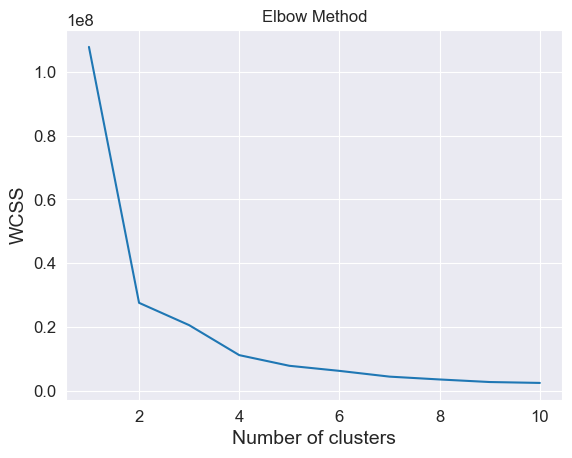

In [377]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(patient)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [378]:
patient.head()

,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,AJCC Stage,...,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp),PAM50 mRNA,RPPA Clusters
0,66.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,1.0,10.0,...,0.0,-13.0,3.0,5.0,3.0,2.0,2.0,2.0,3,4
1,40.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,...,-12.0,-13.0,4.0,4.0,4.0,2.0,1.0,1.0,3,4
2,48.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-12.0,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,3,4
3,56.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,4.0,...,-12.0,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,3,4
4,38.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,0.0,8.0,...,0.0,-13.0,5.0,5.0,1.0,2.0,2.0,2.0,3,4


In [429]:
X=patient[['Age at Initial Pathologic Diagnosis','ER Status','PR Status',"HER2 Final Status","Tumor","Tumor--T1 Coded","Node","Node-Coded","Metastasis","Converted Stage","Survival Data Form","Vital Status","Days to date of Death","Days to Date of Last Contact","PAM50 mRNA","OS Time","SigClust Unsupervised mRNA","SigClust Intrinsic mRNA","miRNA Clusters","methylation Clusters","CN Clusters","Integrated Clusters (no exp)","Integrated Clusters (unsup exp)","Integrated Clusters (with PAM50)","RPPA Clusters"]]
y=patient["OS event"]

In [430]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [431]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
 random_state=42)

In [440]:
knn = KNeighborsClassifier(n_neighbors=4)

In [441]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [442]:
y_predicted = knn.predict(X_test)

In [443]:
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy) 

Accuracy: 0.9523809523809523
